In [1]:
import sys
home_dir = '../'
sys.path.append(home_dir)
print(sys.path)

from steevebase.io import load_sequence, save_sequence
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

['', '/root/miniconda3/lib/python36.zip', '/root/miniconda3/lib/python3.6', '/root/miniconda3/lib/python3.6/lib-dynload', '/root/miniconda3/lib/python3.6/site-packages', '/root/steem_ailib/piston-lib', '/root/steem_ailib', '/root/miniconda3/lib/python3.6/site-packages/IPython/extensions', '/root/.ipython', '../']


In [3]:
# neg_count = 200000
pos_count = 10000

In [4]:
# data_bin = load_sequence("/home/hrosspet/steem_ailib/posts_2017_25_08_clean.jsonl")
# data_bin = load_sequence("/root/steem_ailib/posts_2017_10_20_clean.jsonl")
data_bin = load_sequence("/root/steem_ailib/posts_2017_11_12.jsonl")
len(data_bin)

69979

In [5]:
df = pd.DataFrame(data_bin)
df.head()

,_id,body,net_votes,title,total_payout,total_weighted_log_rep,url
0,@gtrplayer/peter-thiel-bitcoin-is-very-underes...,Its like a reserve form of money. Its like gol...,0,Peter Thiel: Bitcoin is 'very underestimated',0.000,0.000000,/cryptocurrency/@gtrplayer/peter-thiel-bitcoin...
1,@vilagra/tokenstars-take-part-in-the-formation...,"[ICO][BOUNTY] NaPoleonX: + <pic>+, ! , ...",1,NaPoleonX:,0.000,6.658683,/cryptocurency/@vilagra/tokenstars-take-part-i...
2,@jessalin/1er-concurso-abierto-de-arte-express...,"<center> +++***Hola!, Hola!, Hola! Mis Steemad...",4,1er Concurso abierto de arte 'Expressions',0.000,16.097005,/spanish/@jessalin/1er-concurso-abierto-de-art...
3,@bambang/cashaa-the-new-banking-platform-for-t...,<pic>++Bank is an institution or company whose...,15,CASHAA The new Banking Platform for the next B...,0.017,139.105570,/cryptocurrency/@bambang/cashaa-the-new-bankin...
4,@crypto-nyte/the-australian-government-is-on-t...,# Cryptocurrency threatens governments complet...,1,The Australian Government Is On The Cryptocurr...,0.000,54.761692,/altcoins/@crypto-nyte/the-australian-governme...


## Label all metrics

In [6]:
# keep net_votes for later
df['votes'] = df['net_votes']
stats = ['votes', 'total_payout', 'total_weighted_log_rep']
for stat in stats:
    df = df.sort_values(stat)
    df.loc[df.index[:-pos_count], stat] = 0
#     df.loc[df.index[neg_count:-pos_count], stat] = pd.np.nan
    df.loc[df.index[-pos_count:], stat] = 1

### Combination of Votes and Rep

<IPython.core.display.Javascript object>


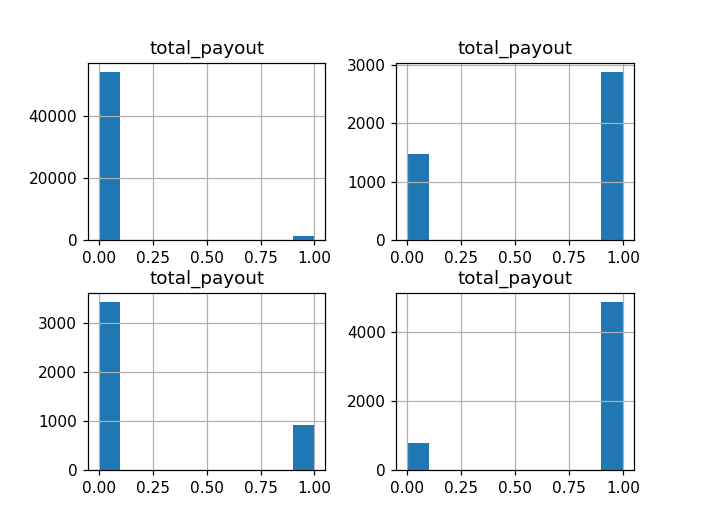

In [7]:
fig, ax = plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        df.loc[(df['votes'] == i) & (df['total_weighted_log_rep'] == j), ['total_payout']].hist(figsize=(3,3), ax=ax[i,j]);

In [8]:
df['target'] = 0
# df['target'] = pd.np.nan
# df.loc[(df['votes'] == 0) & (df['total_weighted_log_rep'] == 0), 'target'] = 0
df.loc[(df['votes'] == 1) & (df['total_weighted_log_rep'] == 1), 'target'] = 1
neg_count = (df['target'] == 0).sum()
pos_count = (df['target'] == 1).sum()
total_count = neg_count + pos_count
print("Neg: \t%d\nPos: \t%d\nTotal: \t%d" % (neg_count, pos_count, total_count))

Neg: 	64337
Pos: 	5642
Total: 	69979


# Filter columns for training

In [9]:
names = ['title', 'body', 'net_votes', 'target', 'url']
df_trimmed = df[names]
df_trimmed = df_trimmed.dropna()

df_trimmed.loc[:,'target'] = df_trimmed.loc[:,'target'].astype(int)

# Save labeled data

In [11]:
result = [dict(zip(names, obj)) for obj in df_trimmed.values]

# Shuffle
pd.np.random.seed(167546)
shuffle_indices = pd.np.arange(len(result))
pd.np.random.shuffle(shuffle_indices)
result = [result[i] for i in shuffle_indices]

# Save
# save_sequence('../data/data.jsonl', result)
# save_sequence('../posts_2017_10_20_labeled.jsonl', result)
save_sequence('../posts_2017_11_12_labeled.jsonl', result)